## importing relevant libraries and loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
files.upload()

Saving 1.04.+Real-life+example.csv to 1.04.+Real-life+example.csv


{'1.04.+Real-life+example.csv': b'\xef\xbb\xbfBrand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model\r\nBMW,4200,sedan,277,2,Petrol,yes,1991,320\r\nMercedes-Benz,7900,van,427,2.9,Diesel,yes,1999,Sprinter 212\r\nMercedes-Benz,13300,sedan,358,5,Gas,yes,2003,S 500\r\nAudi,23000,crossover,240,4.2,Petrol,yes,2007,Q7\r\nToyota,18300,crossover,120,2,Petrol,yes,2011,Rav 4\r\nMercedes-Benz,199999,crossover,0,5.5,Petrol,yes,2016,GLS 63\r\nBMW,6100,sedan,438,2,Gas,yes,1997,320\r\nAudi,14200,vagon,200,2.7,Diesel,yes,2006,A6\r\nRenault,10799,vagon,193,1.5,Diesel,yes,2012,Megane\r\nVolkswagen,1400,other,212,1.8,Gas,no,1999,Golf IV\r\nRenault,11950,vagon,177,1.5,Diesel,yes,2011,Megane\r\nRenault,2500,sedan,260,1.79,Petrol,yes,1994,19\r\nAudi,9500,vagon,165,2.7,Gas,yes,2003,A6 Allroad\r\nVolkswagen,10500,sedan,100,1.8,Petrol,yes,2008,Passat B6\r\nToyota,16000,crossover,250,4.7,Gas,yes,2001,Land Cruiser 100\r\nRenault,8600,hatch,84,1.5,Diesel,yes,2012,Clio\r\nBMW,2990,other,203,2,Petrol,n

In [3]:
df = pd.read_csv("/content/1.04.+Real-life+example.csv")
df_c = df

## Preprocessing

### explore the data

In [4]:
df_c.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [5]:
df_c.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### determine the variable of interest

In [6]:
df_c_1 = df_c.drop("Model", axis=1)

In [7]:
df_c_1.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


### dealing with missing values

In [8]:
( df_c_1.isna()).sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [9]:
# nan values are less than 5%
data = df_c_1.dropna(axis=0)

In [10]:
(data.isna().sum())

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [11]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### exlplore the prices

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


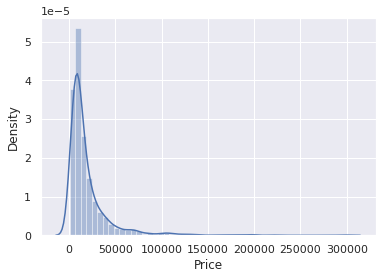

In [12]:
sns.distplot(data["Price"])

#### removing the outleirs

In [13]:
q = data["Price"].quantile(0.99)
data_1 = data.loc[data["Price"]<q,:]

In [14]:
data_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [15]:
data_1.loc[data["Price"]<q,["Price", "Body"]]

,Price,Body
0,4200.0,sedan
1,7900.0,van
2,13300.0,sedan
3,23000.0,crossover
4,18300.0,crossover
...,...,...
4339,17900.0,sedan
4340,125000.0,sedan
4341,6500.0,sedan
4342,8000.0,sedan


In [16]:
q = data_1["EngineV"].quantile(0.99)
data_2 = data_1.loc[data["EngineV"]<6.5,:]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


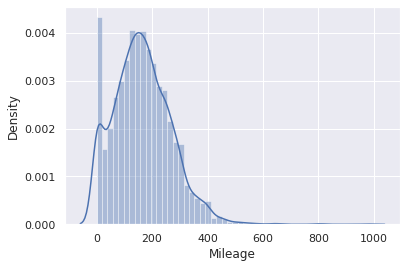

In [17]:
sns.distplot(data_2["Mileage"])

In [18]:
q =data_2["Mileage"].quantile(0.99)
data_3 = data_2[data_2["Mileage"]<q]

In [19]:
data_3.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


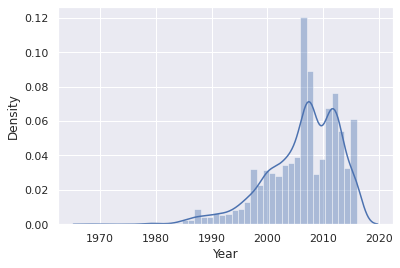

In [20]:
sns.distplot(data_3["Year"])

In [21]:
q=data_3["Year"].quantile(0.1)

In [22]:
data_cleaned = data_3[data_3["Year"]>q]

In [23]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3459.000000,3459.000000,3459.000000,3459.000000
mean,19798.156652,147.932639,2.464053,2008.148598
std,19542.540521,86.691460,0.972008,4.575174
min,1200.000000,0.000000,0.600000,1999.000000
25%,8400.000000,85.000000,1.800000,2005.000000
50%,12850.000000,148.000000,2.200000,2008.000000
75%,23500.000000,205.000000,3.000000,2012.000000
max,129222.000000,427.000000,6.300000,2016.000000


In [24]:
data_cleaned = data_cleaned.reset_index(drop = True)

### checking ols assumption




Text(0.5, 1.0, 'Year')

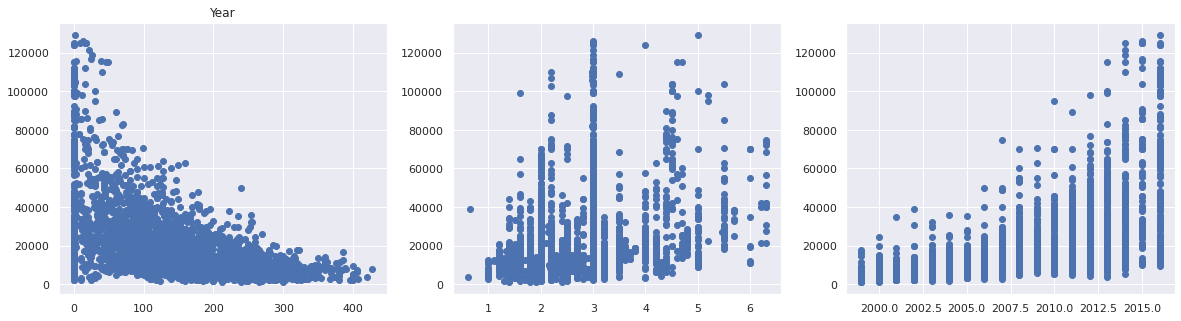

In [25]:
f, (ax1,ax2,ax3) = plt.subplots(1,3 , figsize = (20,5))
ax1.scatter(data_cleaned["Mileage"],data_cleaned["Price"] )
ax1.set_title("Mileage")
ax2.scatter(data_cleaned["EngineV"],data_cleaned["Price"] )
ax1.set_title("EngineV")
ax3.scatter(data_cleaned["Year"],data_cleaned["Price"] )
ax1.set_title("Year")


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


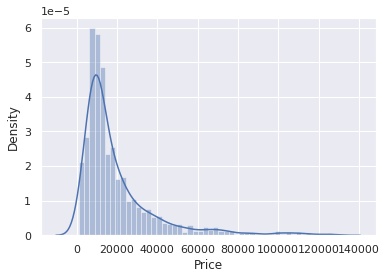

In [26]:
# the predicted variable must be normal dist
# it is not
sns.distplot(data_cleaned["Price"])

In [27]:
data_cleaned["Price"] = np.log(data_cleaned["Price"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


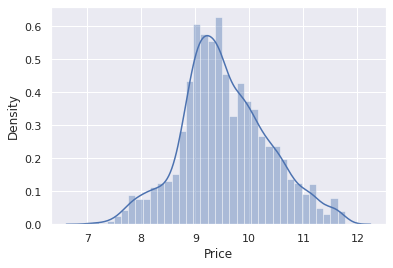

In [28]:
sns.distplot(data_cleaned["Price"])

Text(0.5, 1.0, 'Year')

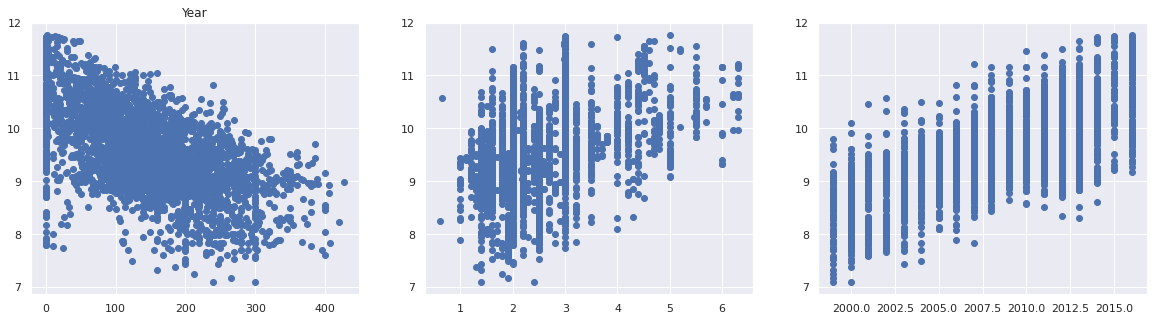

In [29]:
f, (ax1,ax2,ax3) = plt.subplots(1,3 , figsize = (20,5))
ax1.scatter(data_cleaned["Mileage"],data_cleaned["Price"] )
ax1.set_title("Mileage")
ax2.scatter(data_cleaned["EngineV"],data_cleaned["Price"] )
ax1.set_title("EngineV")
ax3.scatter(data_cleaned["Year"],data_cleaned["Price"] )
ax1.set_title("Year")

#### checking for multicolleaniraty

In [30]:
  from statsmodels.stats.outliers_influence import variance_inflation_factor 
  variables = data_cleaned[["Mileage", "EngineV", "Year"]]
  vifs = [variance_inflation_factor(variables.values, i )for i in range(3)]
  vif = pd.DataFrame()
  vif["VIF"] =vifs
  vif["features"] = variables.columns

In [31]:
vif

,VIF,features
0,3.891813,Mileage
1,7.424041,EngineV
2,10.133661,Year


In [32]:
# drop Year in general we had to drop values over 5
price = data_cleaned["Price"]

In [33]:
data_final = data_cleaned.drop(["Year", "Price"], axis=1)


In [34]:
data_final.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration
0,Mercedes-Benz,van,427,2.9,Diesel,yes
1,Mercedes-Benz,sedan,358,5.0,Gas,yes
2,Audi,crossover,240,4.2,Petrol,yes
3,Toyota,crossover,120,2.0,Petrol,yes
4,Audi,vagon,200,2.7,Diesel,yes


### dealing with dummies

In [35]:
data_with_dummies = pd.get_dummies(data_final , drop_first=True) # to prevent multcoleanarty

In [36]:
  # checking for correllation
  vifs = [variance_inflation_factor(data_with_dummies.values, i )for i in range(data_with_dummies.shape[1])]
  vif = pd.DataFrame()
  vif["VIF"] =vifs
  vif["features"] = data_with_dummies.columns

In [37]:
vif

,VIF,features
0,4.682532,Mileage
1,8.268215,EngineV
2,2.235083,Brand_BMW
3,2.953529,Brand_Mercedes-Benz
4,1.723686,Brand_Mitsubishi
5,2.241776,Brand_Renault
6,2.333765,Brand_Toyota
7,2.965009,Brand_Volkswagen
8,1.435331,Body_hatch
9,1.523559,Body_other


## The Linear Reg Model

In [38]:
target = price
features = data_with_dummies

### Scaling [link text](https://)

In [40]:
scaler = StandardScaler()
inputs = scaler.fit_transform(features)

### split data

In [41]:
x_train , x_test , y_train , y_test = train_test_split(inputs, target , test_size = 0.2, random_state= 42)

### Reg model

In [42]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [44]:
reg.coef_, reg.intercept_

(array([-0.42019628,  0.211367  ,  0.02624606,  0.00593471, -0.15260418,
        -0.20600292, -0.08164315, -0.09923484, -0.12211338, -0.09180921,
        -0.15003708, -0.10313311, -0.15445243, -0.10523459, -0.03425195,
        -0.14418838,  0.3050944 ]), 9.553519632787447)

In [72]:
y_hat = reg.predict(x_train)

Text(0.5, 0, 'y_hat')

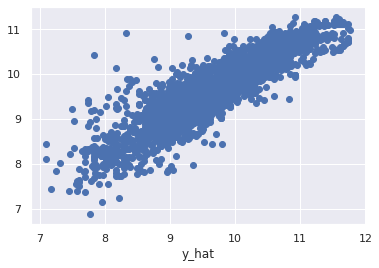

In [77]:
plt.scatter(y_train, y_hat)
plt.xlabel("y_train")
plt.xlabel("y_hat")


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


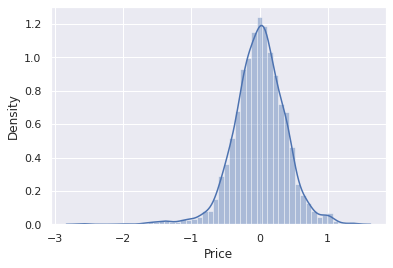

In [78]:
#plot residuals 
sns.distplot(y_train-y_hat)

In [79]:
reg.score(x_train,y_train) #how mush explain the model

0.7793870888923534

### Testing

In [93]:
  y_pred = reg.predict(x_test)
  df = pd.DataFrame({"predicted" : np.exp(y_pred), "target" :np.exp (y_test)})

In [94]:
df["residuals"] = df["predicted"] - df["target"]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


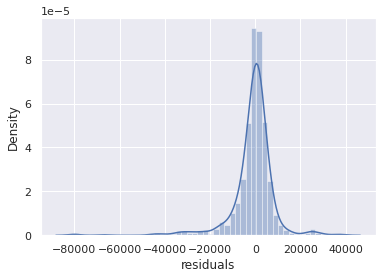

In [95]:
sns.distplot(df["residuals"])

(6.0, 13.0)

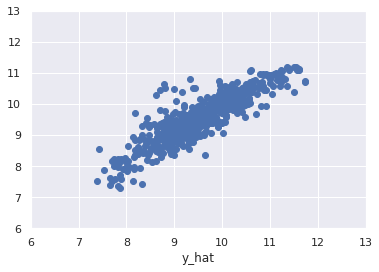

In [88]:
plt.scatter(df.target, df.predicted)
plt.xlabel("y_train")
plt.xlabel("y_hat")
plt.xlim(6,13)
plt.ylim(6,13)

(6.0, 13.0)

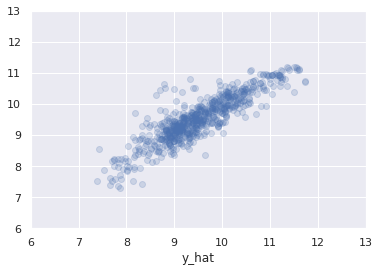

In [90]:
plt.scatter(df.target, df.predicted, alpha=0.2)
plt.xlabel("y_train")
plt.xlabel("y_hat")
plt.xlim(6,13)
plt.ylim(6,13)

In [97]:
df["residuals in percent"] = (df["residuals"]/df["target"])*100

In [99]:
df.sort_values(by="residuals in percent" , ascending=False, inplace= True)

In [101]:
df.describe()  
# the model is not good for the low prices

,predicted,target,residuals,residuals in percent
count,692.000000,692.000000,692.000000,692.000000
mean,17964.450399,18954.308627,-989.858228,11.523781
std,13982.876324,18835.824479,9779.726713,58.480742
min,1482.366918,1600.000000,-80211.847056,-72.372891
25%,8761.231595,8000.000000,-3113.291195,-18.528704
50%,13125.469573,12350.000000,289.301426,2.819914
75%,22551.588351,22800.000000,2845.799886,27.357404
max,72348.842049,126000.000000,38505.413699,555.728745
